In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stateDictionary = {
    "AL": "Alabama",
    "AS": "American Samoa",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "Montana": "MT",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "DC": "District of Columbia"
}

# Covid 19 Analysis
The COVID-19 pandemic has had a significant impact on the world, with millions of cases and deaths reported globally. In this analysis, we will use pandas to explore a dataset of COVID-19 cases and deaths in the United States. The dataset includes information such as the date of submission, state, total cases, confirmed cases, probable cases, new cases, total deaths, confirmed deaths, probable deaths, new deaths, and consent for cases and deaths. By analyzing this dataset, we hope to gain insights into the trends and patterns of COVID-19 cases and deaths in the US, as well as identify any factors that may be contributing to the spread of the virus.

The Data was provided by Data.gov, which is a government agency devoted to releasing public information to the public.
The link to the data set can be found here: [Data Website](https://catalog.data.gov/dataset/united-states-covid-19-cases-and-deaths-by-state-over-time)



In [16]:
covid_df = pd.read_csv('USACovid.csv')
covid_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60055,02/09/2021,TX,2504556,NaN,NaN,13329,2676.0,43306,NaN,NaN,207,0.0,02/11/2021 12:00:00 AM,Not agree,Not agree
60056,11/20/2020,FL,913561,NaN,NaN,8217,1677.0,19014,NaN,NaN,79,5.0,11/20/2020 12:00:00 AM,Not agree,Not agree
60057,08/17/2020,NM,23500,NaN,NaN,92,0.0,682,NaN,NaN,4,0.0,08/19/2020 12:00:00 AM,NaN,Not agree
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,06/19/2020 12:00:00 AM,Agree,Agree


# Data Cleaning
- In order to ensure the data provided is accurate, all NaN occurences as been replaced with 0.
- The replacement of NaN with zero will hurt the data representation, so for the further calculations, if the column is zero, it will be omitted from the evaluation.

# Visuals
- In order to represent the data in a more friendly manner, the tables will remain presorted in ascending order.
- The states were previously identified with the state name abbreviation. Ex: WI

In [14]:
covid_df = covid_df.fillna(0)
covid_df['state'] = covid_df['state'].replace(stateDictionary)
covid_df['submission_date'] = pd.to_datetime(covid_df['submission_date'])
covid_df = covid_df.sort_values('submission_date')
covid_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
50494,2020-01-22,Washington,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,01/22/2020 12:00:00 AM,0,0
696,2020-01-22,MP,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,01/24/2020 12:00:00 AM,Agree,Agree
57385,2020-01-22,Iowa,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
23958,2020-01-22,Maine,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,01/24/2020 12:00:00 AM,Agree,Agree
11300,2020-01-22,Puerto Rico,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27145,2022-10-18,Oregon,902319,902319.0,0.0,0,0.0,8622,8622.0,0.0,0,0.0,10/19/2022 01:15:24 PM,Agree,Agree
49839,2022-10-18,Kansas,883063,655917.0,227146.0,0,0.0,9590,0.0,0.0,0,0.0,10/19/2022 01:15:24 PM,Agree,0
56843,2022-10-18,American Samoa,8251,0.0,0.0,0,0.0,34,0.0,0.0,0,0.0,10/19/2022 01:15:24 PM,0,0
390,2022-10-18,New Mexico,623179,0.0,0.0,266,0.0,8601,0.0,0.0,0,0.0,10/19/2022 01:15:24 PM,0,Not agree


# States Represented with Total Death

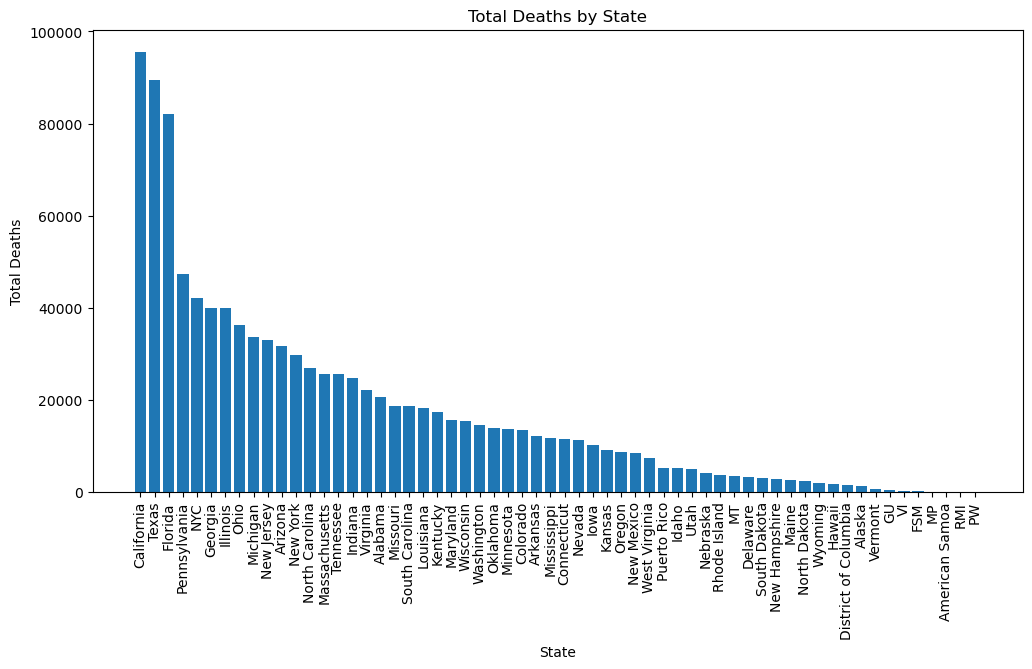

In [5]:
grouped_df = covid_df.groupby('state').agg({'new_death': 'sum'}).reset_index()
grouped_df_sorted = grouped_df.sort_values('new_death', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(grouped_df_sorted['state'], grouped_df_sorted['new_death'])
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.title("Total Deaths by State")
plt.show()

# The Big Three
From the graph below, the big three in terms of total death is California, Texas, and Florida.
If we were to compare this to the top three states in terms of population as of 2022, it follows the same course.

While it is not appropriate to come to a conclusion based on how covid spreads, it is fairly interesting to visualize the process of a higher population correlating to a higher death rate.


In [6]:
top_three_death = grouped_df_sorted.head(3)
top_three_death.columns = top_three_death.columns.str.replace("new_death", "Total Deaths")
top_three_death

,state,Total Deaths
5,California,95604
51,Texas,89429
11,Florida,82065


# Total Cases by State & Political Affiliation

Analyzing total COVID-19 cases by state and grouping them by political party affiliation can help understand the impact of political decisions, identify potential disparities in the number of cases, and inform public health policy decisions. 

However, it's important to note that COVID-19 is a complex issue with many factors at play, and political party affiliation is just one of many potential variables that could influence the number of cases. Therefore, any analysis should be carefully considered and not relied upon as the sole source of information.

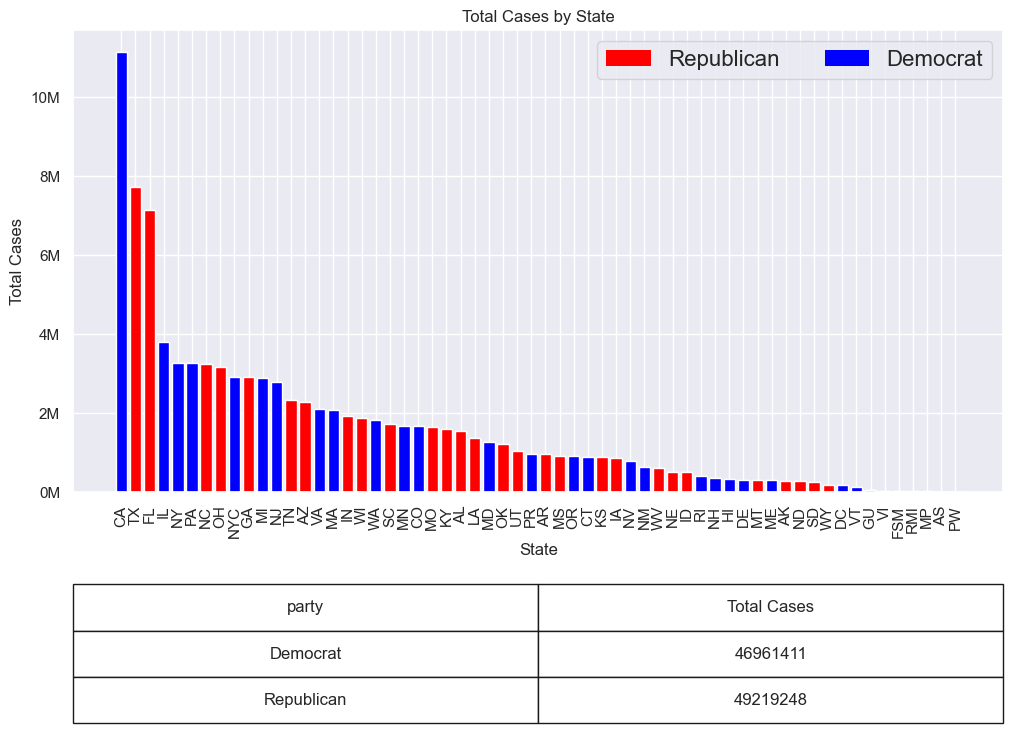

In [60]:
# Covid total cases by state and party 2022-12-31
# republic states 2020
republican_states_2020 = ['AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA', 'MS', 'MO', 'MT', 'NE', 'NC', 'ND', 'OH', 'OK', 'SC', 'SD', 'TN', 'TX', 'UT', 'WV', 'WI', 'WY']

# democrat states 2020
democrat_states_2020 = ['CA', 'CO', 'CT', 'DE', 'HI', 'IL', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'DC']

# add party column
grouped_df_sorted['party'] = grouped_df_sorted['state'].apply(lambda x: 'Republican' if x in republican_states_2020 else 'Democrat')

# total cases by party
cases_by_party = grouped_df_sorted.groupby('party').agg({'new_case': 'sum'}).reset_index()
cases_by_party.columns = cases_by_party.columns.str.replace("new_case", "Total Cases")

# total cases by state
cases_by_state = grouped_df_sorted.groupby('state').agg({'new_case': 'sum'}).reset_index()
cases_by_state.columns = cases_by_state.columns.str.replace("new_case", "Total Cases")
cases_by_state = cases_by_state.sort_values('Total Cases', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(cases_by_state['state'], cases_by_state['Total Cases'])
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.title("Total Cases by State")

# change the color of the bars based on party
plt.bar(cases_by_state['state'], cases_by_state['Total Cases'], color=['red' if x in republican_states_2020 else 'blue' for x in cases_by_state['state']])


# represent y-axis in millions of cases by leading non-zero digits
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000)) + 'M'))

# Legend showing total number of cases by party
plt.legend([plt.Rectangle((0,0),1,1,fc='red', edgecolor = 'none'), plt.Rectangle((0,0),1,1,fc='blue', edgecolor = 'none')], ['Republican', 'Democrat'], loc=1, ncol = 2, prop={'size':16})

# Table showing total number of cases by party
plt.table(cellText=cases_by_party.values, colLabels=cases_by_party.columns, loc='bottom', cellLoc='center', colLoc='center', bbox=[0, -0.5, 1, 0.3])

plt.show()

